# Proyecto Machine Learning

In [20]:
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import missingno as msno
from sklearn.model_selection import train_test_split
import shap
from missforest import MissForest
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import lightgbm as lgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score


## Cargar la base de datos

In [21]:
df = pd.read_csv("/workspaces/steven10015-intro-ml/data/raw/bank-marketing-campaign-data.csv", sep =';')
# Fijar el id como indice
pd.set_option('display.max_columns', None)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [22]:
df.shape

(41188, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 1. Limpieza de datos

## 1.1. Verificar valores unicos

In [24]:
unicos = df.nunique()
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
41183
41184
41185
41186


 Ninguna columna con un único valor

## 1.2. Visualizar valores duplicados

### Filas duplicadas

In [25]:
filas_dupli = df.duplicated()
df[filas_dupli]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [26]:
# Paso extra
filas_dupli[filas_dupli==True].index

Index([ 1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516,
       36951, 38281],
      dtype='int64')

In [27]:
df[filas_dupli].shape

(12, 21)

In [28]:
# Se eliminan las filas duplicadas
df.drop_duplicates(keep = "first", inplace=True)

In [29]:
df.shape

(41176, 21)

### Columnas duplicadas

In [30]:
dup_col=df.T.duplicated(keep=False).sum()
print("No hay variables exactamente iguales" if dup_col==0 else "Hay variables exactamente iguales")

No hay variables exactamente iguales


In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Recuerda hacer train split antes de imputar

## 1.3. Verificar datos faltantes (object)

In [32]:
# columnas=df.select_dtypes(include='object').drop(columns="y", axis=1)
#bcolumnas.isnull().sum()
# for col in columnas.columns:
    #print("-"*20)
    #print(f"Columna: {col}")
    #print("-"*20)
    #print(columnas[col].value_counts(dropna=False))
""

''

In [36]:
# Seleccionar columnas tipo object excepto "y"
columnas = df.select_dtypes(include='object').drop(columns="y", axis=1)

# Crear tabla de nulos y porcentaje
nulls = columnas.isnull().sum().to_frame("Nulos")
nulls["Porcentaje"] = (nulls["Nulos"] / len(columnas)) * 100

# Mostrar resultados
print(nulls)

             Nulos  Porcentaje
job            330    0.801438
marital         80    0.194288
education     1730    4.201477
default       8596   20.876239
housing        990    2.404313
loan           990    2.404313
contact          0    0.000000
month            0    0.000000
day_of_week      0    0.000000
poutcome     35551   86.339130


age                0.00
job                0.80
marital            0.19
education          4.20
default           20.88
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome          86.34
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64


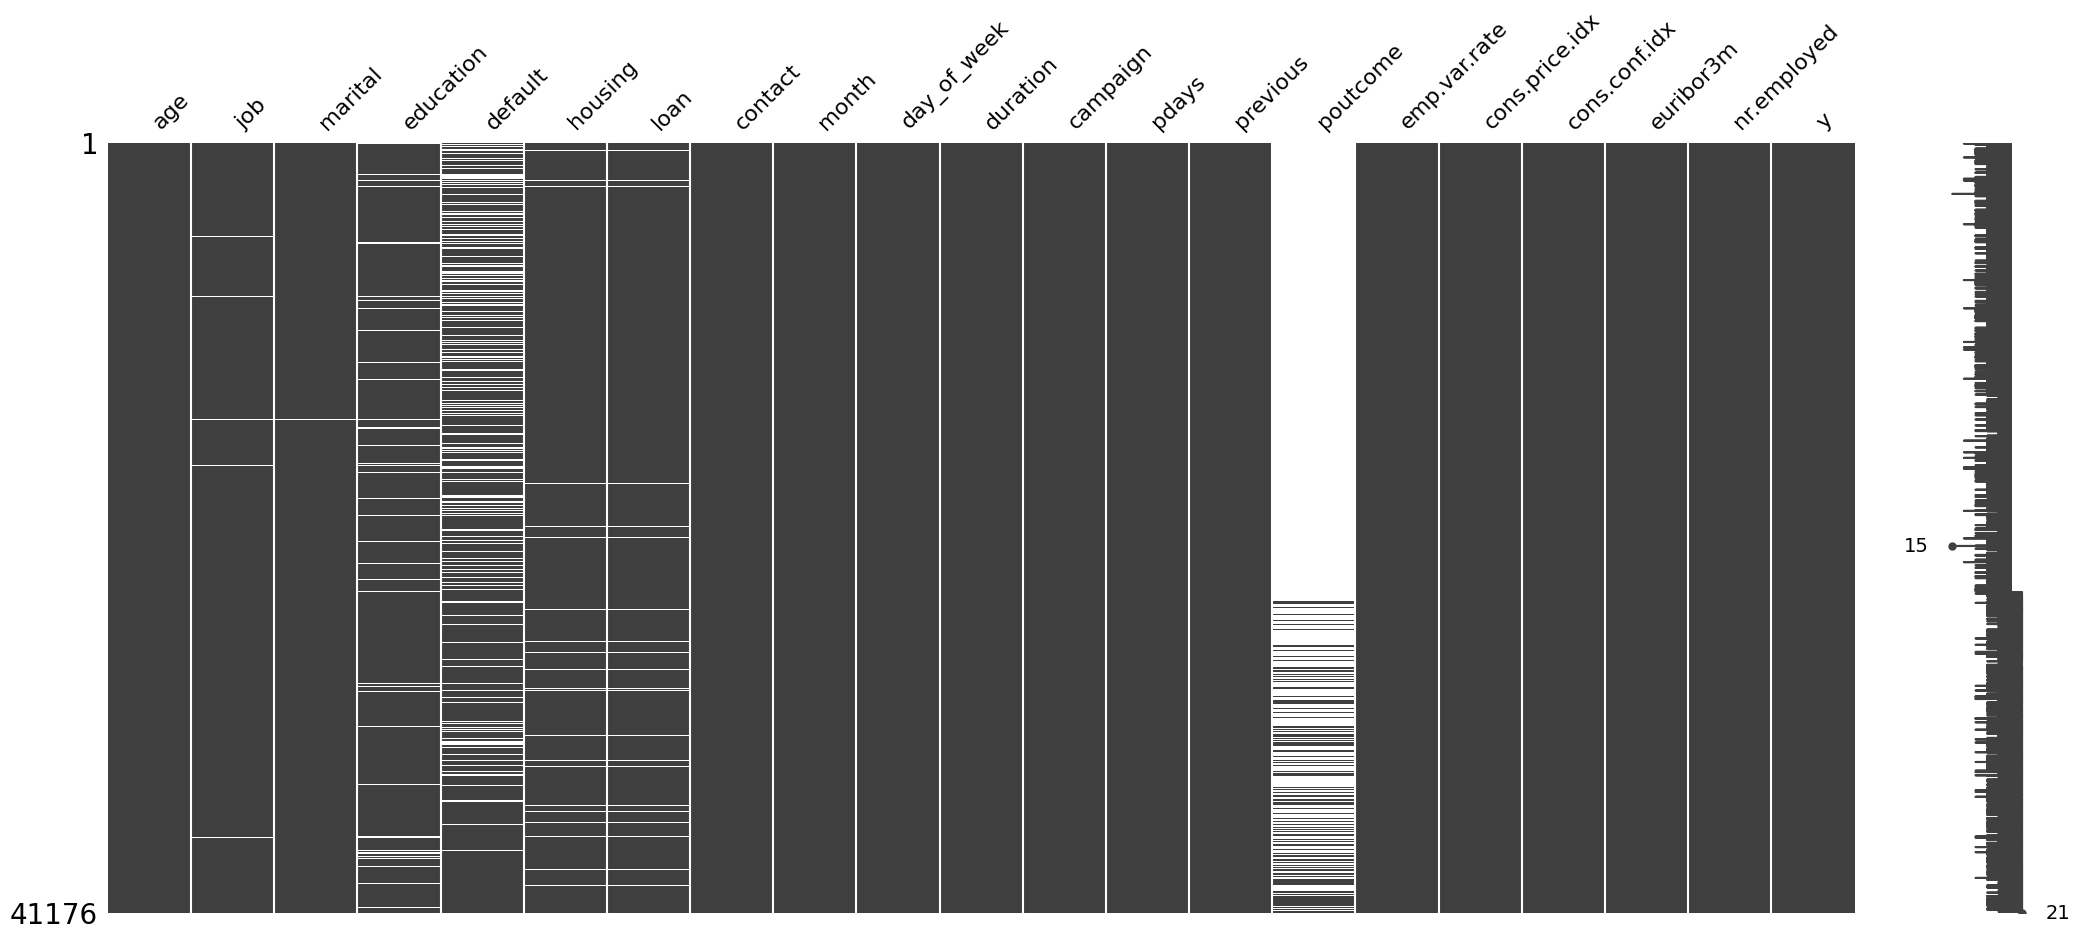

In [37]:
# Reemplazar 'unknown' y 'nonexistent' por NaN
df = df.replace(['unknown', 'nonexistent'], np.nan)
print((df.isnull().sum()* 100 / len(df)).round(2))
msno.matrix(df)
plt.show()

## 2. Codificar variables categóricas

In [38]:
# Separar variables categóricas y numéricas
categoricas = df.select_dtypes(include='object').columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convertir categóricas a números temporalmente
df_temp = df.copy()
for col in categoricas:
    df_temp[col] = df_temp[col].astype('category').cat.codes # Los valores -1 representan NaN

## 3. División train/test